### SSAI-3D: Training Demo
This is a demo for SSAI-3D. A GPU is recommended

#### Preparations
import needed packages.

In [1]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume,\
     semi_synthetic_creation, generate_raw_data, generate_zs_dataset, adjust_contrast
from basicsr.model_train import trainer_train, restore
from easydict import EasyDict
import os

Load anisotropic raw stack, generated semi-synthetic dataset, as well as zero-shot dataset

In [2]:
raw_tif_pth, kernel_num, project_depth, data_pth = \
    './raw_data.tif', 3, 5, './demo_dataset'

semi_synthetic_creation(raw_tif_pth = raw_tif_pth, save_pth = data_pth, \
    kernel_num = kernel_num, project_depth = project_depth, downsample_rate = 5,  rotation = False)

generate_raw_data(raw_pth = raw_tif_pth, save_pth= data_pth, dr = 5)
generate_zs_dataset(data_pth)

Obtain zero-shot metrics as well as the relative performance of each layer within the network via a pre-trained surgeon network

In [4]:
configs = EasyDict({
    'model_path' : f'./experiments/pretrained_models/NAFNet-REDS-width64.pth',
    'lq_pth': os.path.join(data_pth, 'zs_lq'),
    'gt_pth': os.path.join(data_pth, 'zs_gt'),
    'lr': 1e-4
})
operation = Surgeon(configs)
operation.get_zeroshot_information()
surgeon_trainer = SurgeonTrainer()
elementwise_input = operation.input_dict.copy()
rank = surgeon_trainer.forward_all(elementwise_input)

Disable distributed.
none
rank: 0
ws: 1


2024-09-20 08:18:44,917 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of dict object at 0x7463e9e5b9c0>
.. cosineannealingLR
grad_norm
snip
grasp
fisher


/home/youlab/anaconda3/envs/learned_uncertainty/lib/python3.8/site-packages/torch/nn/modules/module.py:1359: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


plain
synflow


#### Training the network

In [5]:
trainer_train(rank, data_pth)

Disable distributed.
none
Path already exists. Rename it to /home/youlab/demo_tmp/SSAI-3D/experiments/demo_neurons_archived_20240920_081919
Path already exists. Rename it to tb_logger/demo_neurons_archived_20240920_081919


2024-09-20 08:19:19,669 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.2.0+154b7b3
	PyTorch: 2.1.2+cu121
	TorchVision: 0.16.2+cu121
2024-09-20 08:19:19,669 INFO: 
  name: demo_neurons
  model_type: ImageRestorationModel
  scale: 1
  num_gpu: 1
  manual_seed: 10
  datasets:[
    train:[
      name: reds-train
      type: PairedImageDataset
      dataroot_gt: ./demo_dataset/gt
      dataroot_lq: ./de

 load net keys <built-in method keys of dict object at 0x74636ef47180>
.. cosineannealingLR


2024-09-20 08:19:22,124 INFO: Start training from epoch: 0, iter: 0
2024-09-20 08:20:24,659 INFO: [demo_..][epoch:  0, iter:     200, lr:(9.055e-05,)] [eta: 0:04:11, time (data): 0.328 (0.002)] l_pix: -4.4141e+01 
2024-09-20 08:21:25,485 INFO: [demo_..][epoch:  0, iter:     400, lr:(6.563e-05,)] [eta: 0:03:05, time (data): 0.237 (0.004)] l_pix: -3.5256e+01 
2024-09-20 08:22:26,339 INFO: [demo_..][epoch:  0, iter:     600, lr:(3.476e-05,)] [eta: 0:02:02, time (data): 0.312 (0.002)] l_pix: -4.4203e+01 
2024-09-20 08:23:27,289 INFO: [demo_..][epoch:  1, iter:     800, lr:(9.732e-06,)] [eta: 0:01:01, time (data): 0.371 (0.002)] l_pix: -4.7219e+01 
2024-09-20 08:24:28,048 INFO: [demo_..][epoch:  1, iter:   1,000, lr:(1.002e-07,)] [eta: 0:00:00, time (data): 0.265 (0.002)] l_pix: -4.5851e+01 
2024-09-20 08:24:28,049 INFO: Saving models and training states.
2024-09-20 08:24:28,644 INFO: End of training. Time consumed: 0:05:06
2024-09-20 08:24:28,645 INFO: Save the latest model.


#### Resolution Restoration

In [4]:
data_pth = './demo_dataset'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
# Currently set batch size to 1 to be compatible with smaller GPUs, can be adjusted as needed to speed up inference.
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')

Disable distributed.
none


2024-09-20 14:27:34,805 INFO: Loading NAFNetLocal model from ../experiments/demo_neurons/models/net_g_latest.pth.
2024-09-20 14:27:35,147 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x730da61bb440>


100%|██████████| 500/500 [01:10<00:00,  7.06it/s]

Disable distributed.


none


2024-09-20 14:29:00,227 INFO: Loading NAFNetLocal model from ../experiments/demo_neurons/models/net_g_latest.pth.


 load net keys <built-in method keys of collections.OrderedDict object at 0x730da61bb340>


2024-09-20 14:29:02,341 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 400/400 [01:06<00:00,  6.04it/s]


Average from XZ and YZ directions

In [5]:
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

100%|██████████| 400/400 [00:05<00:00, 78.82it/s]


#### Visualization

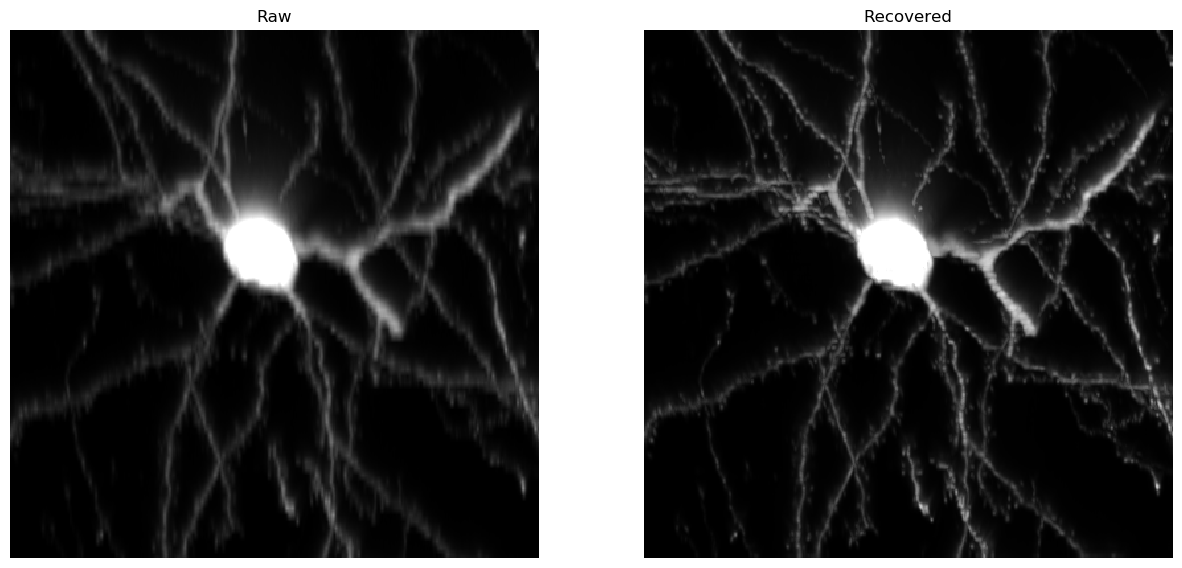

In [6]:
import tifffile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 200
depth = 200
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()


#### Resolution Enhancement with Denoising

In [8]:
data_pth = './demo_dataset'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './denoised_results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
# Currently set batch size to 1 to be compatible with smaller GPUs, can be adjusted as needed to speed up inference.
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth = './experiments/pretrained_models/denoising_model.pth', denoise = True) 
        # './experiments/pretrained_models/denoising_model.pth', denoise = True)

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  './experiments/pretrained_models/denoising_model.pth', denoise = True)


data_pth = './denoised_results'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './deconved_denoised_results'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  '../experiments/demo_neurons/models/net_g_latest.pth')


Disable distributed.
none


2024-09-20 14:30:39,869 INFO: Loading NAFNet model from /home/youlab/Desktop/workspace/titus/Learned_Uncertainty_Quantification/Experiments/finetuned_weights.pth.


 load net keys <built-in method keys of collections.OrderedDict object at 0x730d9318c4c0>


2024-09-20 14:30:41,500 WARNING: Current net - loaded net:
2024-09-20 14:30:41,503 WARNING:   ending.bias
2024-09-20 14:30:41,504 WARNING:   ending.weight
2024-09-20 14:30:41,505 WARNING: Loaded net - current net:
2024-09-20 14:30:41,506 WARNING:   ending.lower.bias
2024-09-20 14:30:41,506 WARNING:   ending.lower.weight
2024-09-20 14:30:41,507 WARNING:   ending.prediction.bias
2024-09-20 14:30:41,507 WARNING:   ending.prediction.weight
2024-09-20 14:30:41,508 WARNING:   ending.upper.bias
2024-09-20 14:30:41,508 WARNING:   ending.upper.weight
2024-09-20 14:30:41,510 WARNING: Size different, ignore [intro.weight]: crt_net: torch.Size([64, 3, 3, 3]); load_net: torch.Size([64, 5, 3, 3])
2024-09-20 14:30:41,848 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 500/500 [01:10<00:00,  7.07it/s]

Disable distributed.


none


2024-09-20 14:31:54,294 INFO: Loading NAFNet model from /home/youlab/Desktop/workspace/titus/Learned_Uncertainty_Quantification/Experiments/finetuned_weights.pth.


 load net keys <built-in method keys of collections.OrderedDict object at 0x730d95ba2f40>


2024-09-20 14:31:56,042 WARNING: Current net - loaded net:
2024-09-20 14:31:56,043 WARNING:   ending.bias
2024-09-20 14:31:56,044 WARNING:   ending.weight
2024-09-20 14:31:56,045 WARNING: Loaded net - current net:
2024-09-20 14:31:56,046 WARNING:   ending.lower.bias
2024-09-20 14:31:56,047 WARNING:   ending.lower.weight
2024-09-20 14:31:56,048 WARNING:   ending.prediction.bias
2024-09-20 14:31:56,049 WARNING:   ending.prediction.weight
2024-09-20 14:31:56,049 WARNING:   ending.upper.bias
2024-09-20 14:31:56,050 WARNING:   ending.upper.weight
2024-09-20 14:31:56,052 WARNING: Size different, ignore [intro.weight]: crt_net: torch.Size([64, 3, 3, 3]); load_net: torch.Size([64, 5, 3, 3])
2024-09-20 14:31:56,270 INFO: Model [ImageRestorationModel] is created.
100%|██████████| 400/400 [01:07<00:00,  5.96it/s]

Disable distributed.


none


2024-09-20 14:33:04,243 INFO: Loading NAFNetLocal model from ../experiments/demo_neurons/models/net_g_latest.pth.
2024-09-20 14:33:04,540 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x730d930afe40>


100%|██████████| 500/500 [01:10<00:00,  7.07it/s]

Disable distributed.


none


2024-09-20 14:34:16,945 INFO: Loading NAFNetLocal model from ../experiments/demo_neurons/models/net_g_latest.pth.
2024-09-20 14:34:17,124 INFO: Model [ImageRestorationModel] is created.


 load net keys <built-in method keys of collections.OrderedDict object at 0x730d9318c6c0>


100%|██████████| 400/400 [00:55<00:00,  7.16it/s]


In [9]:
xz, yz, av = restore_volume(in_pth_xz, out_pth_xz, out_pth_yz)

100%|██████████| 400/400 [00:05<00:00, 73.31it/s]


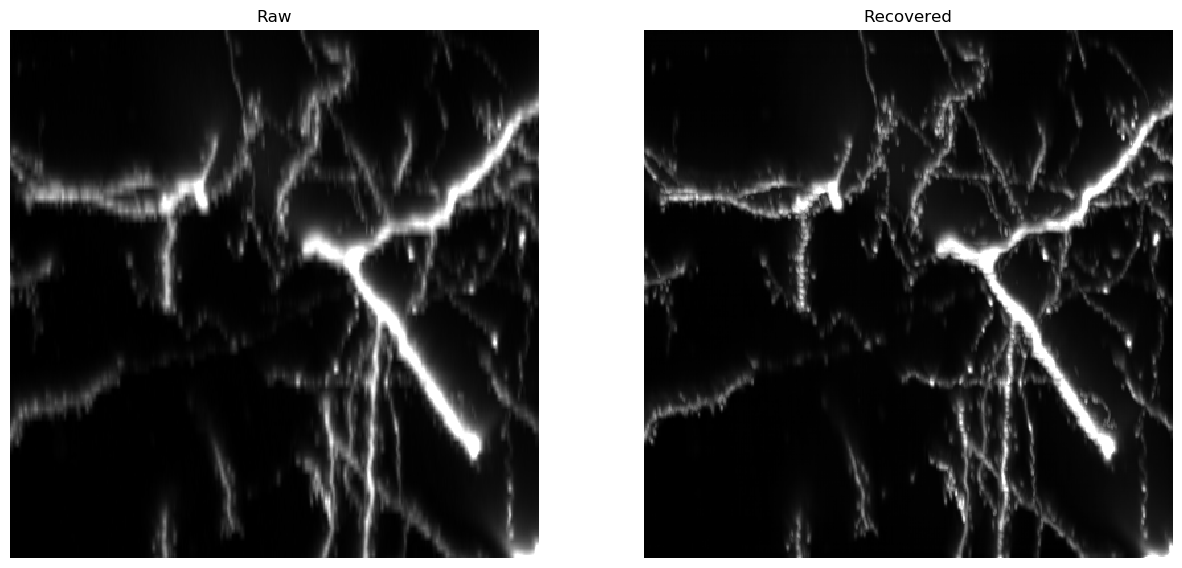

In [13]:
import tifffile
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
raw_tif_pth = './raw_data.tif'
raw = tifffile.imread(raw_tif_pth)

slice_idx = 100
depth = 200
figs, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(adjust_contrast(cv2.resize(np.amax(raw[:, :, slice_idx:slice_idx + depth], -1), (1153, 194*5))[:400, :400]), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Raw')
axs[1].imshow(adjust_contrast(np.amax(av[slice_idx:slice_idx + depth], 0)[:400, :400]), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Recovered')
plt.show()